# Online Retail II UCI
### A real online retail transaction data set of two years.
This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling.
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv("online_retail_II.csv")


In [3]:
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df.shape


(1067371, 8)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [6]:
df.describe()


,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


#### Why this matters

Understand data size

Detect missing values

Identify numeric vs categorical columns

## Data Validation

### 1. Missing Values

In [7]:
df.isnull().sum()


Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

### 2. Duplicate Rows

In [8]:
df.duplicated().sum()


np.int64(34335)

### 3. Invalid Values

In [9]:
# Negative Quantity (Returns)
df[df["Quantity"] <= 0].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia


In [10]:
# Zero or Negative Price
df[df["Price"] <= 0].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom


# Data Cleaning

In [ ]:
df = df.dropna(subset=["Customer ID"]) #dropping null Customer ID rows
df = df[df["Quantity"] > 0] #keeping only positive Quantity rows
df = df[df["Price"] > 0] #keeping only positive Price rows


In [58]:
df["Customer ID"] = df["Customer ID"].astype("Int64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805549 entries, 0 to 1067370
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      805549 non-null  object        
 1   StockCode    805549 non-null  object        
 2   Description  805549 non-null  object        
 3   Quantity     805549 non-null  int64         
 4   InvoiceDate  805549 non-null  datetime64[ns]
 5   Price        805549 non-null  float64       
 6   Customer ID  805549 non-null  Int64         
 7   Country      805549 non-null  object        
 8   TotalPrice   805549 non-null  float64       
 9   Year         805549 non-null  int32         
 10  Month        805549 non-null  int32         
 11  Day          805549 non-null  int32         
 12  Hour         805549 non-null  int32         
dtypes: Int64(1), datetime64[ns](1), float64(2), int32(4), int64(1), object(4)
memory usage: 74.5+ MB


## Feature Engineering
#### Create TotalPrice

In [59]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice,Year,Month,Day,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009,12,1,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009,12,1,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009,12,1,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009,12,1,7


## Time-Based EDA

### 1. Convert Date

In [17]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [18]:
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df["Day"] = df["InvoiceDate"].dt.day
df["Hour"] = df["InvoiceDate"].dt.hour


### 2. Monthly Sales Trend

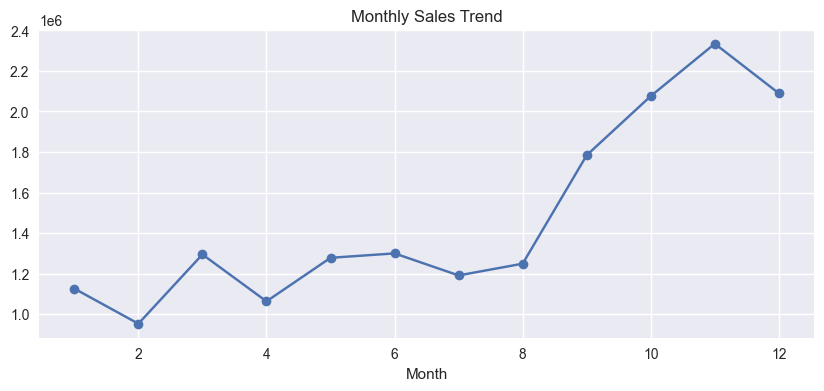

In [19]:
monthly_sales = df.groupby("Month")["TotalPrice"].sum()

monthly_sales.plot(marker="o", figsize=(10,4))
plt.title("Monthly Sales Trend")
plt.show()


### 3. Hourly Purchase Pattern

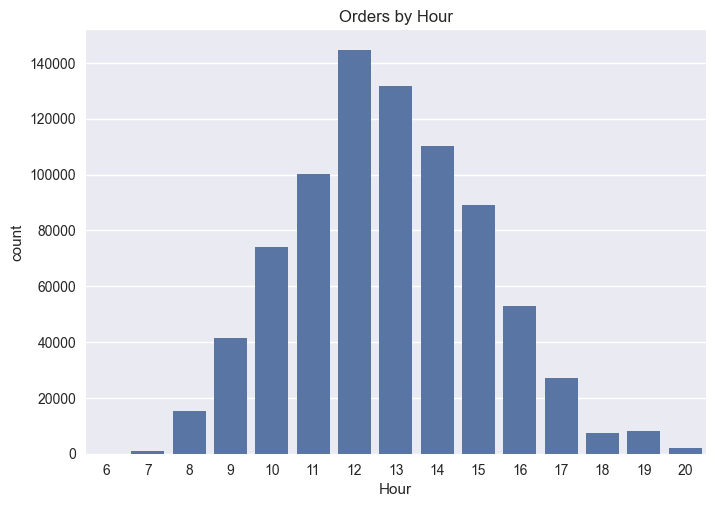

In [20]:
sns.countplot(x=df["Hour"])
plt.title("Orders by Hour")
plt.show()


## Product-Level EDA

### 1. Top Selling Products

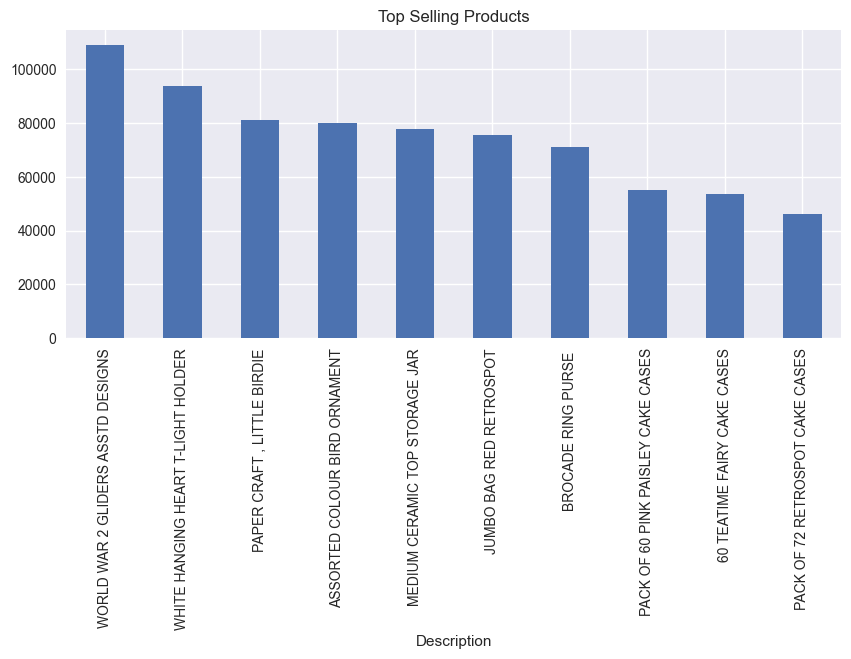

In [21]:
top_products = (
    df.groupby("Description")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products.plot(kind="bar", figsize=(10,4))
plt.title("Top Selling Products")
plt.show()


### 2. Revenue by Product

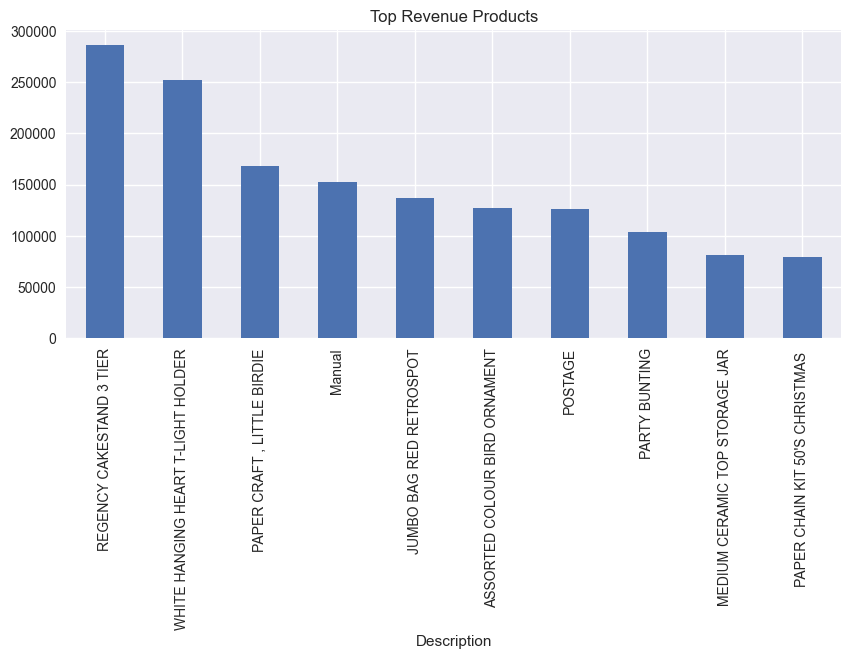

In [22]:
top_revenue_products = (
    df.groupby("Description")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_revenue_products.plot(kind="bar", figsize=(10,4))
plt.title("Top Revenue Products")
plt.show()


## Customer-Level EDA

### 1. Orders per Customer

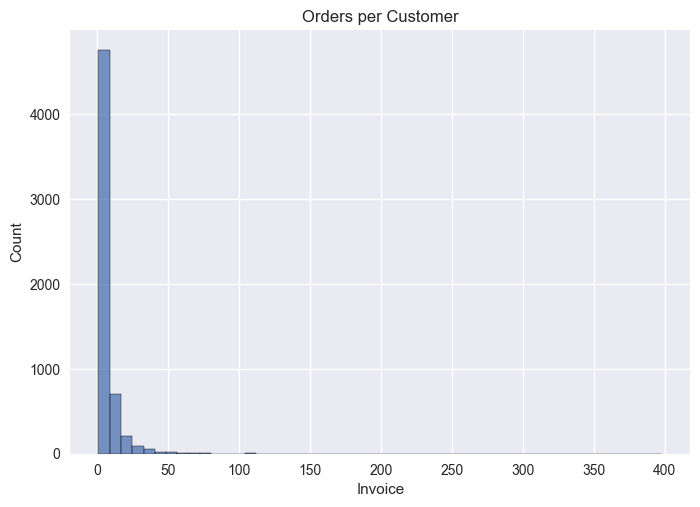

In [23]:
orders_per_customer = df.groupby("Customer ID")["Invoice"].nunique()

sns.histplot(orders_per_customer, bins=50)
plt.title("Orders per Customer")
plt.show()


### 2. Revenue per Customer

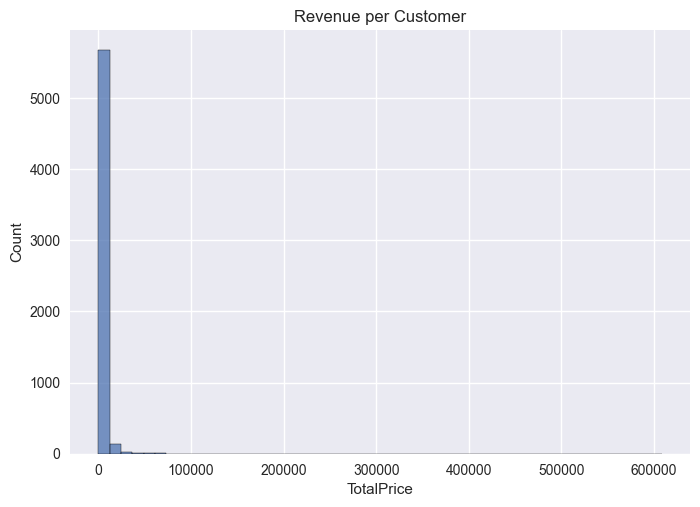

In [24]:
revenue_per_customer = df.groupby("Customer ID")["TotalPrice"].sum()

sns.histplot(revenue_per_customer, bins=50)
plt.title("Revenue per Customer")
plt.show()


### RFM Analysis

- R = Recency → how many days since the customer last purchased
- F = Frequency → how many invoices (orders) the customer made
- M = Monetary → how much money the customer spent in total

In [64]:
latest_date = df["InvoiceDate"].max()

rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "Invoice": "nunique",
    "TotalPrice": "sum"
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head(15)


,Recency,Frequency,Monetary
Customer ID,,,
12346,325,12,77556.46
12347,1,8,5633.32
12348,74,5,2019.40
12349,18,4,4428.69
12350,309,1,334.40
12351,374,1,300.93
12352,35,10,2849.84
12353,203,2,406.76
12354,231,1,1079.40


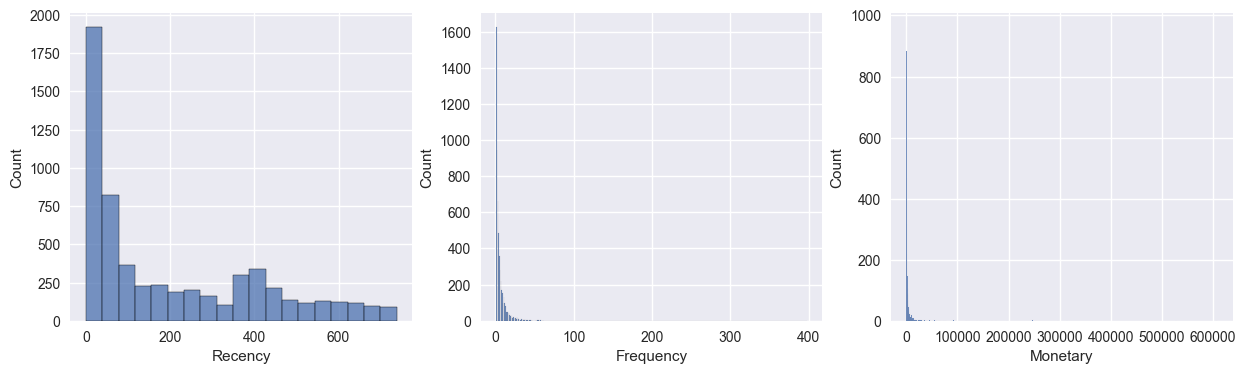

In [26]:
# RFM distributions
fig, ax = plt.subplots(1,3, figsize=(15,4))

sns.histplot(rfm["Recency"], ax=ax[0])
sns.histplot(rfm["Frequency"], ax=ax[1])
sns.histplot(rfm["Monetary"], ax=ax[2])

plt.show()


### 2. Product Co-occurrence

### Correlation Analysis

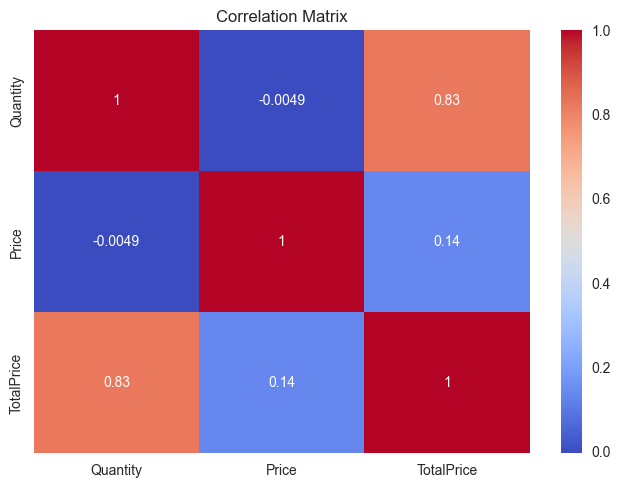

In [27]:
numeric_cols = ["Quantity", "Price", "TotalPrice"]

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## Outlier Detection

### 1. Order Value Outliers

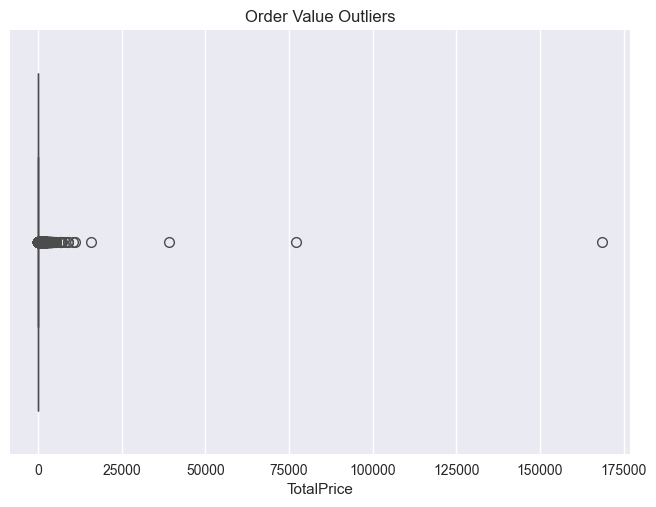

In [28]:
sns.boxplot(x=df["TotalPrice"])
plt.title("Order Value Outliers")
plt.show()


### 2. High-Spending Customers

In [29]:
rfm["Monetary"].quantile([0.90, 0.95, 0.99])

0.90     5595.3650
0.95     9535.3360
0.99    29730.4202
Name: Monetary, dtype: float64

# Modelling

### Problem Statement : Predict whether a customer is a high-value customer based on their purchase behavior?
#### Type: Binary Classification, Target: HighValueCustomer
1 → High-value customer
0 → Normal customer

### CREATE CUSTOMER-LEVEL DATA (FROM TRANSACTIONS)

In [30]:
customer_df = df.groupby("Customer ID").agg({
    "Invoice": "nunique",        # number of orders
    "Quantity": "sum",           # total quantity purchased
    "TotalPrice": "sum"          # total money spent
}).reset_index()

customer_df.columns = [
    "CustomerID",
    "NumOrders",
    "TotalQuantity",
    "TotalSpent"
]

customer_df.head()


,CustomerID,NumOrders,TotalQuantity,TotalSpent
0,12346.0,12,74285,77556.46
1,12347.0,8,3286,5633.32
2,12348.0,5,2714,2019.40
3,12349.0,4,1624,4428.69
4,12350.0,1,197,334.40


### CREATE TARGET VARIABLE (LABEL)

In [31]:
threshold = customer_df["TotalSpent"].quantile(0.75)

customer_df["HighValueCustomer"] = (
    customer_df["TotalSpent"] >= threshold
).astype(int)


- We calculate the 75th percentile of total customer spending and use it as a threshold, so only the top 25% of customers by spending are considered high value.
- Customers whose total spending is above this threshold are labeled as 1 (High Value), and the rest are labeled as 0 (Not High Value). This converts business logic into a machine-learning-ready label.
- We check the count of 0s and 1s to confirm that the data is not too imbalanced and that we have enough high-value customers to train a reliable model.

In [32]:
customer_df["HighValueCustomer"].value_counts()


HighValueCustomer
0    4408
1    1470
Name: count, dtype: int64

### FEATURE SELECTION (X) & TARGET (y)

In [41]:
X = customer_df[["NumOrders", "TotalQuantity"]]
y = customer_df["HighValueCustomer"]


Why these features?

NumOrders → loyalty

TotalQuantity → buying volume


### TRAIN–TEST SPLIT

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


- 80% of the data is used to train the model and 20% is held out as unseen test data to check how well the model performs on new customers.
- Setting a fixed random_state ensures the same train-test split every time, so results are stable and easy to compare.
- Using stratify=y guarantees both training and test sets have the same class distribution, preventing biased evaluation.

### BUILD DECISION TREE

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=4,          # keeps tree interpretable
    min_samples_leaf=20,  # reduces overfitting
    random_state=42
)

dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)

- A decision tree works like a flowchart of yes/no questions.
- At each step, it asks a question about the data (for example: Did the customer spend more than X?).
- Based on the answers, it moves down the tree and finally makes a prediction (High-Value customer or Not).

- max_depth=4 limits how deep the tree can grow, keeping the logic simple and interpretable.
- min_samples_leaf=20 ensures each final decision is based on enough customers, reducing overfitting.
- random_state=42 makes sure the tree is built the same way every time we run the code.
- dt.fit(X_train, y_train) teaches the model patterns from past customer behavior so it can classify customers as high-value or not.

We’re using a simple, interpretable decision tree that learns from past customer data while being carefully constrained to avoid overfitting and remain business-explainable.”

Accuracy: 0.9387755102040817

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       882
           1       0.88      0.87      0.88       294

    accuracy                           0.94      1176
   macro avg       0.92      0.92      0.92      1176
weighted avg       0.94      0.94      0.94      1176



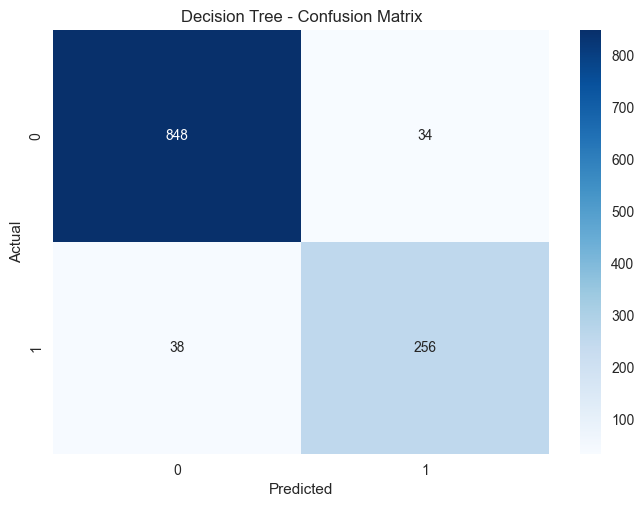

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree - Confusion Matrix")
plt.show()


- We test the model on new, unseen data
- The model makes predictions on the test dataset (X_test).
- This simulates how the model would perform on real future customers.

- Accuracy – overall correctness
- Accuracy ≈ 94%, meaning the model correctly classifies about 94 out of 100 customers.
- This gives a high-level confidence that the model is working well.

- Class 0 → Not High-Value Customer
- Class 1 → High-Value Customer
- Precision (How accurate the model is when it predicts a class)
- Recall (How many actual customers the model finds)
- F1-score (Balance between precision and recall)
- macro : Treats class 0 and class 1 equally, Good for fairness analysis.
- weighted: Weighs metrics based on how many samples each class has, More influenced by class 0 (since it has more customers)

“The model correctly classifies about 94% of customers, performs extremely well for regular customers, and identifies high-value customers with strong precision and recall, making it suitable for targeted business actions.”

- Rows = Actual values (what the customer really is)
- Columns = Predicted values (what the model predicted)
- Actual = 0, Predicted = 0, 848 customers were not high-value
- Actual = 0, Predicted = 1, 34 customers were not high-value, Model predicted them as high-value
- Actual = 1, Predicted = 0, 38 customers were actually high-value, Model predicted them as not high-value
- Actual = 1, Predicted = 1, 256 customers were high-value, Model correctly identified them

In [51]:
from sklearn.tree import export_text

rules = export_text(dt, feature_names=list(X.columns))
print(rules)


|--- TotalQuantity <= 1251.50
|   |--- NumOrders <= 10.50
|   |   |--- TotalQuantity <= 827.00
|   |   |   |--- NumOrders <= 6.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumOrders >  6.50
|   |   |   |   |--- class: 0
|   |   |--- TotalQuantity >  827.00
|   |   |   |--- NumOrders <= 5.50
|   |   |   |   |--- class: 0
|   |   |   |--- NumOrders >  5.50
|   |   |   |   |--- class: 0
|   |--- NumOrders >  10.50
|   |   |--- TotalQuantity <= 809.50
|   |   |   |--- class: 0
|   |   |--- TotalQuantity >  809.50
|   |   |   |--- class: 1
|--- TotalQuantity >  1251.50
|   |--- TotalQuantity <= 1560.50
|   |   |--- NumOrders <= 8.50
|   |   |   |--- TotalQuantity <= 1296.50
|   |   |   |   |--- class: 1
|   |   |   |--- TotalQuantity >  1296.50
|   |   |   |   |--- class: 0
|   |   |--- NumOrders >  8.50
|   |   |   |--- NumOrders <= 10.50
|   |   |   |   |--- class: 1
|   |   |   |--- NumOrders >  10.50
|   |   |   |   |--- class: 1
|   |--- TotalQuantity >  1560.50
|   |   |--- NumOr

- It takes the trained decision tree model (dt)
- Converts the tree into human-readable IF–ELSE rules
- Prints out the logic the model uses to make decision
- “If a customer bought fewer items and placed fewer orders, they are not a high-value customer.”
- “If a customer places many orders and buys enough quantity, they are a high-value customer.”

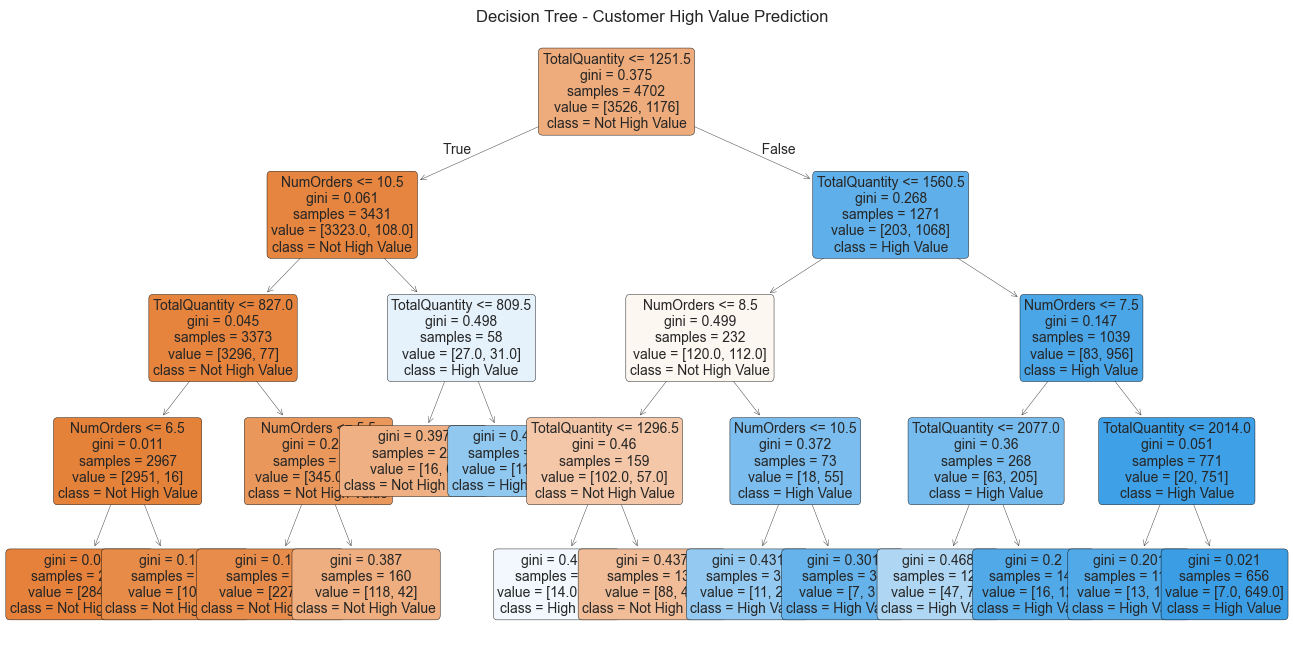

In [52]:
from sklearn.tree import plot_tree

plt.figure(figsize=(16,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=["Not High Value", "High Value"],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree - Customer High Value Prediction")
plt.show()


- This is a visual flowchart of your decision tree model.
- The questions the model asks
- The order in which it asks them
- The final decision it makes:High-Value customer or Not High-Value customer
- Has this customer bought 1251 items or fewer in total?

- Gini impurity tells us how mixed a group is.
- Low Gini → most customers in that group are the same type
- High Gini → the group has a mix of different types

TotalQuantity    0.948797
NumOrders        0.051203
dtype: float64


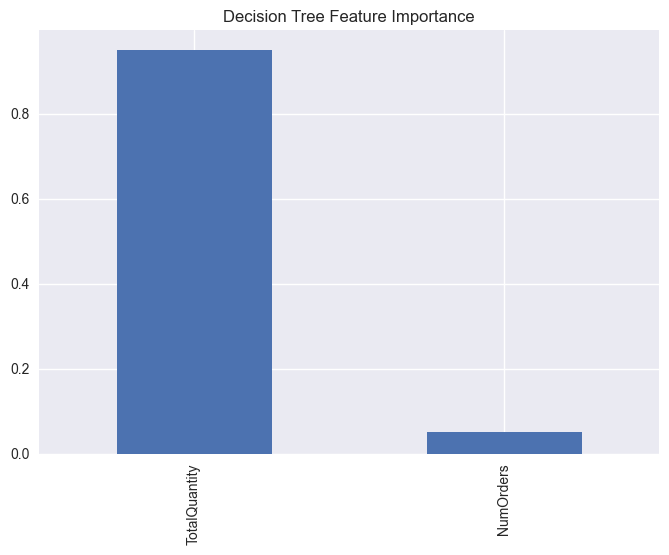

In [53]:
import pandas as pd

fi = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print(fi)

fi.plot(kind="bar", title="Decision Tree Feature Importance")
plt.show()


In [54]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

for train_idx, test_idx in skf.split(X, y):
    X_tr, X_te = X.iloc[train_idx], X.iloc[test_idx]
    y_tr, y_te = y.iloc[train_idx], y.iloc[test_idx]

    dt_cv = DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)
    dt_cv.fit(X_tr, y_tr)
    y_hat = dt_cv.predict(X_te)

    scores.append(accuracy_score(y_te, y_hat))

print("Fold Accuracies:", scores)
print("Mean Accuracy:", np.mean(scores))
print("Std:", np.std(scores))


Fold Accuracies: [0.9277210884353742, 0.9489795918367347, 0.9464285714285714, 0.9387234042553192, 0.9472340425531914]
Mean Accuracy: 0.9418173397018382
Std: 0.007876277290393417


### BUILD RANDOM FOREST MODEL

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

### MODEL PREDICTION

In [44]:
y_pred = rf.predict(X_test)


### MODEL EVALUATION

#### 1. Accuracy

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.9404761904761905

#### 2. Classification Report

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       882
           1       0.90      0.86      0.88       294

    accuracy                           0.94      1176
   macro avg       0.93      0.91      0.92      1176
weighted avg       0.94      0.94      0.94      1176



Key metrics to explain in interviews:

Precision → How accurate positive predictions are

Recall → How many high-value customers we captured

F1-score → Balance of precision & recall

#### 3. Confusion Matrix

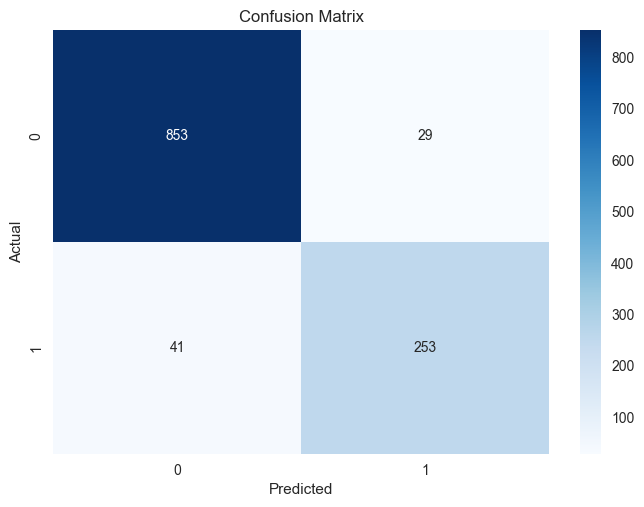

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Interpretation:

TP → correctly identified high-value customers

FP → wrongly predicted as high-value

FN → missed high-value customers (important to minimize)

### FEATURE IMPORTANCE

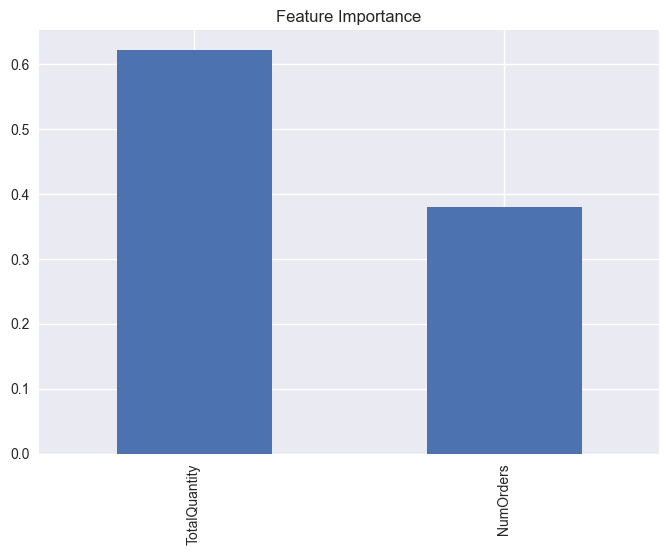

In [48]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind="bar", title="Feature Importance")
plt.show()
